In [52]:
from densenet import DenseNet
from keras.optimizers import RMSprop

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(features_train, labels_train), (features_test, labels_test) = mnist.load_data()

In [4]:
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')
features_train /= 255
features_test /= 255

In [5]:
labels_train = keras.utils.to_categorical(labels_train, 10)
labels_test = keras.utils.to_categorical(labels_test, 10)

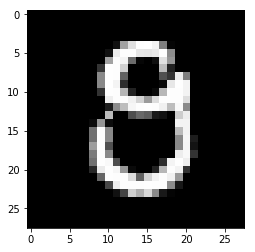

In [6]:
plt.imshow(features_train[80].reshape([28,28]), cmap = 'Greys_r')

In [7]:
img_rows, img_cols = 28, 28
from keras import backend as K 
if K.image_data_format() == 'channels_first':
    #features_train = features_train.reshape(features_train.shape[0],1, img_rows, img_cols)
    #features_test = features_test.reshape(features_test.shape[0],1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    features_train = features_train.reshape(features_train.shape[0], img_rows, img_cols, 1)
    features_test = features_test.reshape(features_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    print("Channels Last.")

Channels Last.


In [53]:
model = DenseNet(input_shape = input_shape)

In [55]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [56]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [54]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_859 (Conv2D)             (None, 28, 28, 24)   216         input_23[0][0]                   
__________________________________________________________________________________________________
batch_normalization_859 (BatchN (None, 28, 28, 24)   96          conv2d_859[0][0]                 
__________________________________________________________________________________________________
activation_859 (Activation)     (None, 28, 28, 24)   0           batch_normalization_859[0][0]    
__________________________________________________________________________________________________
conv2d_860

In [ ]:
 model.fit(features_train, labels_train, epochs = 1, validation_data = (features_test, labels_test), verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1


In [12]:
score = model.evaluate(features_test, labels_test, verbose = 0)
print("Test loss:", score[0])
print("Test Accuracy: ", score[1]*100, "%")

Test loss: 0.103488292468
Test Accuracy:  97.91 %


In [14]:
im = Image.open('output.png').convert("L") # returns image object
    #out_img = imread('output.png')
im = PIL.ImageOps.invert(im) 
    #out_img = np.invert(out_img)
im = im.resize((28,28))
    #out_img = imresize(out_img, (28,28))
im = np.reshape(im, (1,28,28,1))
#plt.imshow(im)

In [15]:
out =model.predict(im)
print(out)
print(np.argmax(out,axis = 1))

[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
[6]
